<a href="https://colab.research.google.com/github/ShumailaAhmed/AI-Workshop/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch

    100% |████████████████████████████████| 591.8MB 25kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x60eb4000 @  0x7ffa63ed32a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [3]:
  n_pts = 100 #define noumber of points we want
  centers = [[-0.5, 0.5], [0.5, -0.5]]#define the center cord for cluster, we have two clusters so we need two centeroids, nested list
  X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4) #creates a cluster of data points randomly centered around a defined centerpoint
  #random state is similar to seed for reproducibility
  #std is the standard deviation of points from respective centerpoint
  #the data lies in X and labels lies in y
  print(X)
  print(y) #y contains the labels 0 and 1 
  x_data = torch.Tensor(X)
  y_data = torch.Tensor(y.reshape(100, 1))
  #print(y.shape)
  #

[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]
 [-0.62590326  0.06563904]
 [-0.31262435  0.16753801]
 [-0.1085056   1.39525734]
 [ 0.09825765  0.92775707]
 [-0.36456438  0.4952678 ]
 [ 0.75682188 -1.29115517]
 [ 0.33484534  0.56577649]
 [-0.66134642  0.44958817]
 [ 0.34335208 -0.44400876]
 [-0.42758595  0.97114478]
 [-0.09837844  0.65447456]
 [ 0.45694611  0.66516486]
 [-0.12901503  0.43054573]
 [ 0.67045866 -1.1421639 ]
 [ 0.82493653 -0.30010394]
 [ 0.72261948 -0.58483205]
 [-0.49886163  0.77528908]
 [-0.03991778 -0.00694082]
 [ 1.05814117 -0.64357437]
 [ 0.60152659 -0.38650986]
 [ 0.57181979 -1.24479028]
 [-0.20505257  1.09629281]
 [ 1.14347639 -0.60809296]
 [-0.97932046  0.57980963]
 [ 0.20367449 -0.4708371 ]
 [-0.79298479  0.01499075]
 [ 0.5081264  -0.57758555]
 

In [4]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1]) #plot the data points with label 0, do a boolean check and g
  plt.scatter(X[y==1, 0], X[y==1, 1]) #plot the 

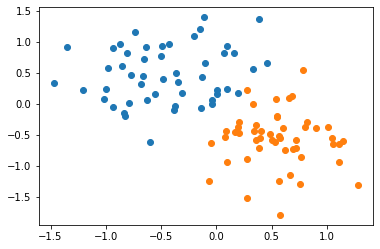

In [5]:
scatter_plot()

In [6]:
class Model(nn.Module): #define a model class as we did earlier
    def __init__(self, input_size, output_size): #add arguments input size and output size as with perceptron structure 
      super().__init__() #for class inheritence
      self.linear = nn.Linear(input_size, output_size)
    def forward(self, x): #To make prediction we define forward function
      pred = torch.sigmoid(self.linear(x)) #for each forward pass we pass the x through linear function and then through sigmoid activation function to get the probabilities
      return pred #return the prediction
    def predict(self, x):
      pred = self.forward(x) # and call the forward pass
      if pred >= 0.5: 
        return 1
      else:
        return 0

In [7]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters())) 

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [8]:
[w, b] = model.parameters() 
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [9]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2, 2])
  x2 = (w1*x1 + b1)/(-w2)
  plt.plot(x1, x2, 'r')
  scatter_plot()
  plt.show()

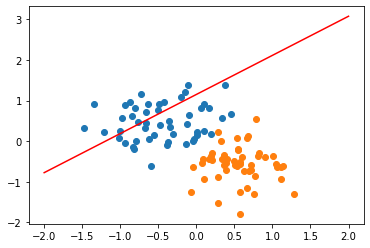

In [10]:
plot_fit('Initial Model')

In [20]:
criterion = nn.BCELoss() #binary loss cross entropy  
optimizer = torch.optim.SGD(model.parameters(), lr=10) # define loss function schocastic gradient descent

In [21]:
epochs = 2000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.05832014977931976
epoch: 1 loss: 0.057165373116731644
epoch: 2 loss: 0.05608072131872177
epoch: 3 loss: 0.05505931004881859
epoch: 4 loss: 0.05409519746899605
epoch: 5 loss: 0.0531831756234169
epoch: 6 loss: 0.052318692207336426
epoch: 7 loss: 0.05149776488542557
epoch: 8 loss: 0.050716832280159
epoch: 9 loss: 0.0499727688729763
epoch: 10 loss: 0.04926273226737976
epoch: 11 loss: 0.0485842227935791
epoch: 12 loss: 0.047934990376234055
epoch: 13 loss: 0.04731297865509987
epoch: 14 loss: 0.0467163510620594
epoch: 15 loss: 0.04614344984292984
epoch: 16 loss: 0.04559273645281792
epoch: 17 loss: 0.0450628288090229
epoch: 18 loss: 0.04455247521400452
epoch: 19 loss: 0.04406048357486725
epoch: 20 loss: 0.04358581081032753
epoch: 21 loss: 0.04312747344374657
epoch: 22 loss: 0.04268456622958183
epoch: 23 loss: 0.04225623607635498
epoch: 24 loss: 0.04184173047542572
epoch: 25 loss: 0.041440319269895554
epoch: 26 loss: 0.04105135053396225
epoch: 27 loss: 0.04067419096827507
epoch

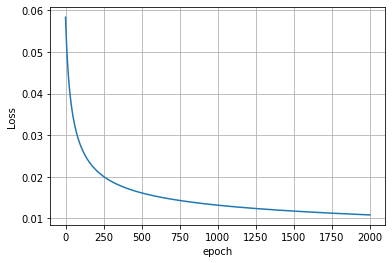

In [22]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

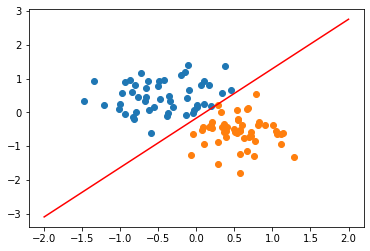

In [24]:
plot_fit("Trained Model")


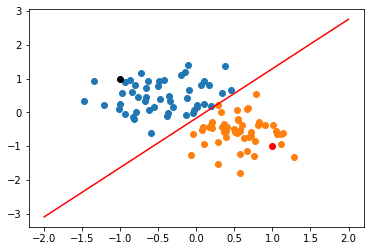

Red point positive probability = 1.0
Black point positive probability = 2.19653034695419e-18
Red point belongs in class 1
Black point belongs in class = 0


In [27]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
plot_fit("Trained Model")
#blue are class 0
#red point class 1
print("Red point positive probability = {}".format(model.forward(point1).item())) 
print("Black point positive probability = {}".format(model.forward(point2).item())) 
print("Red point belongs in class {}".format(model.predict(point1))) 
print("Black point belongs in class = {}".format(model.predict(point2))) 